In [20]:
import os
from PIL import Image
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
import splitfolders

# Split with a ratio.
# To only split into training and validation set, set a tuple to `ratio`, i.e, `(.8, .2)`.
splitfolders.ratio(data_dir, output="outputData3",
    seed=1337, ratio=(.7, .2, .1), group_prefix=None, move=False) # default values

# Split val/test with a fixed number of items, e.g. `(100, 100)`, for each set.
# To only split into training and validation set, use a single number to `fixed`, i.e., `10`.
# Set 3 values, e.g. `(300, 100, 100)`, to limit the number of training values.

In [21]:
data_dir = "MangoData_Disease"
output_dir = "outputData2"
train_dir = os.path.join(output_dir, "train")
test_dir = os.path.join(output_dir, "test")
val_dir = os.path.join(output_dir, "val")

In [22]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

img_size = (224, 224)
batch_size = 32

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode="categorical",
    shuffle=True,
    seed=42, # set a random seed for reproducibility
    interpolation='bicubic' # use bicubic interpolation for image resizing
)

val_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode="categorical",
    shuffle=False,
    interpolation='bicubic' # use bicubic interpolation for image resizing
)

test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode="categorical",
    shuffle=False,
    interpolation='bicubic' # use bicubic interpolation for image resizing
)


Found 2400 images belonging to 8 classes.
Found 800 images belonging to 8 classes.
Found 800 images belonging to 8 classes.


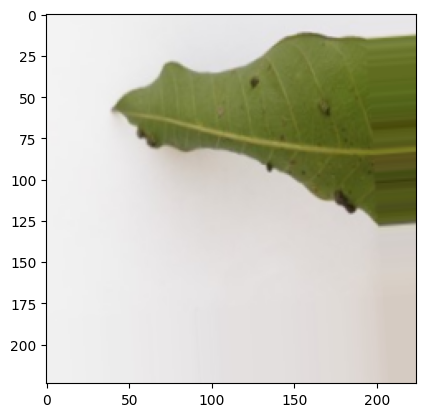

In [23]:
import matplotlib.pyplot as plt

# Get a batch of images and their labels
x_batch, y_batch = next(train_generator)

# Select an image from the batch (index 0)
img = x_batch[28]

# Display the image
plt.imshow(img)
plt.show()


In [24]:
# Set the number of classes in your dataset
num_classes = len(train_generator.class_indices)

# Define the model
model = keras.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', padding='same', input_shape=(img_size[0], img_size[1], 3)),
    layers.BatchNormalization(),
    layers.MaxPooling2D(2,2),

    layers.Conv2D(64, (3,3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(2,2),

    layers.Conv2D(128, (3,3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(2,2),

    layers.Dropout(0.5),
    layers.Flatten(),   
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(num_classes, activation='softmax')
])

# Print the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 32)      896       
                                                                 
 batch_normalization (BatchN  (None, 224, 224, 32)     128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 64)      18496     
                                                                 
 batch_normalization_1 (Batc  (None, 112, 112, 64)     256       
 hNormalization)                                                 
                                                        

In [26]:
model.compile(
    loss='categorical_crossentropy',
    optimizer=keras.optimizers.Adam(learning_rate=0.005),
    metrics=['accuracy']
)

# Train the model
epochs=12
history = model.fit(
    train_generator,
    epochs=epochs,
    validation_data=val_generator
)


Epoch 1/12
75/75 [==============================] - 112s 1s/step - loss: 20.6309 - accuracy: 0.2475 - val_loss: 269.3029 - val_accuracy: 0.1250
Epoch 2/12
75/75 [==============================] - 112s 1s/step - loss: 2.1057 - accuracy: 0.1433 - val_loss: 100.3411 - val_accuracy: 0.1275
Epoch 3/12
75/75 [==============================] - 112s 1s/step - loss: 2.0236 - accuracy: 0.1829 - val_loss: 109.7678 - val_accuracy: 0.1250
Epoch 4/12
75/75 [==============================] - 121s 2s/step - loss: 1.9970 - accuracy: 0.1658 - val_loss: 38.3112 - val_accuracy: 0.1688
Epoch 5/12
75/75 [==============================] - 114s 2s/step - loss: 2.0295 - accuracy: 0.1533 - val_loss: 136.6693 - val_accuracy: 0.2350
Epoch 6/12
75/75 [==============================] - 118s 2s/step - loss: 2.0028 - accuracy: 0.1596 - val_loss: 301.0696 - val_accuracy: 0.1838
Epoch 7/12
75/75 [==============================] - 114s 2s/step - loss: 2.1354 - accuracy: 0.1242 - val_loss: 61.9129 - val_accuracy: 0.2250


In [27]:
test_loss, test_acc = model.evaluate(val_generator)
print("Test accuracy:", test_acc)

25/25 [==============================] - 9s 365ms/step - loss: 2.0747 - accuracy: 0.1287
Test accuracy: 0.1287499964237213


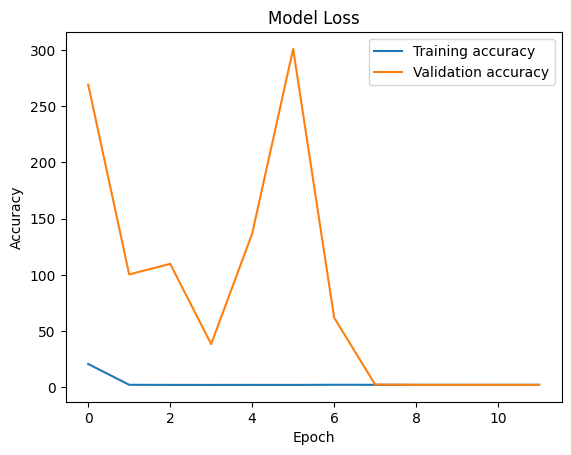

In [28]:
from matplotlib import pyplot as plt

plt.plot(history.history['loss'], label='Training accuracy')
plt.plot(history.history['val_loss'], label='Validation accuracy')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [29]:
# Set the number of classes in your dataset
num_classes = len(train_generator.class_indices)

# Define the model
model = keras.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', padding='same', input_shape=(img_size[0], img_size[1], 3)),
    layers.BatchNormalization(),
    layers.Conv2D(32, (3,3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.Conv2D(32, (3,3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(2,2),


    layers.Flatten(),   
    layers.Dense(num_classes, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(num_classes, activation='softmax')
])

# Print the model summary
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 224, 224, 32)      896       
                                                                 
 batch_normalization_3 (Batc  (None, 224, 224, 32)     128       
 hNormalization)                                                 
                                                                 
 conv2d_4 (Conv2D)           (None, 224, 224, 32)      9248      
                                                                 
 batch_normalization_4 (Batc  (None, 224, 224, 32)     128       
 hNormalization)                                                 
                                                                 
 conv2d_5 (Conv2D)           (None, 224, 224, 32)      9248      
                                                                 
 batch_normalization_5 (Batc  (None, 224, 224, 32)    

In [31]:
model.compile(
    loss='categorical_crossentropy',
    optimizer=keras.optimizers.Adam(learning_rate=0.003),
    metrics=['accuracy']
)

# Train the model
epochs=12
history = model.fit(
    train_generator,
    epochs=epochs,
    validation_data=val_generator
)
test_loss, test_acc = model.evaluate(val_generator)
print("Test accuracy:", test_acc)

Epoch 1/12
75/75 [==============================] - 239s 3s/step - loss: 3.2017 - accuracy: 0.1225 - val_loss: 144.9763 - val_accuracy: 0.1250
Epoch 2/12
75/75 [==============================] - 209s 3s/step - loss: 2.1374 - accuracy: 0.1179 - val_loss: 69.9813 - val_accuracy: 0.1250
Epoch 3/12
75/75 [==============================] - 198s 3s/step - loss: 2.0800 - accuracy: 0.1258 - val_loss: 75.6476 - val_accuracy: 0.1338
Epoch 4/12
75/75 [==============================] - 204s 3s/step - loss: 2.0800 - accuracy: 0.1112 - val_loss: 38.1666 - val_accuracy: 0.0625
Epoch 5/12
75/75 [==============================] - 214s 3s/step - loss: 2.0801 - accuracy: 0.1217 - val_loss: 9.1216 - val_accuracy: 0.1412
Epoch 6/12
75/75 [==============================] - 198s 3s/step - loss: 2.0800 - accuracy: 0.1092 - val_loss: 3.1225 - val_accuracy: 0.1050
Epoch 7/12
75/75 [==============================] - 219s 3s/step - loss: 2.0800 - accuracy: 0.1129 - val_loss: 2.1277 - val_accuracy: 0.1250
Epoch 8/

In [ ]:
from matplotlib import pyplot as plt

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [35]:
# Set the number of classes in your dataset
num_classes = len(train_generator.class_indices)

# Define the model
model = keras.Sequential([
    layers.Conv2D(16, (3,3), activation='relu', padding='same', input_shape=(img_size[0], img_size[1], 3)),
    layers.BatchNormalization(),
    layers.MaxPooling2D(3,3),
    
    layers.Conv2D(32, (3,3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(3,3),
    

    layers.Flatten(),   
    layers.Dense(num_classes, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(num_classes, activation='softmax')
])

# Print the model summary
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 224, 224, 16)      448       
                                                                 
 batch_normalization_8 (Batc  (None, 224, 224, 16)     64        
 hNormalization)                                                 
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 74, 74, 16)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 74, 74, 32)        4640      
                                                                 
 batch_normalization_9 (Batc  (None, 74, 74, 32)       128       
 hNormalization)                                                 
                                                      

In [36]:
model.compile(
    loss='categorical_crossentropy',
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    metrics=['accuracy']
)

# Train the model
epochs=20
history = model.fit(
    train_generator,
    epochs=epochs,
    validation_data=val_generator
)


Epoch 1/20
75/75 [==============================] - 48s 628ms/step - loss: 2.0314 - accuracy: 0.1992 - val_loss: 3.4224 - val_accuracy: 0.1250
Epoch 2/20
75/75 [==============================] - 47s 628ms/step - loss: 1.9830 - accuracy: 0.1742 - val_loss: 4.4792 - val_accuracy: 0.1262
Epoch 3/20
75/75 [==============================] - 44s 584ms/step - loss: 1.9843 - accuracy: 0.1762 - val_loss: 10.7257 - val_accuracy: 0.1262
Epoch 4/20
75/75 [==============================] - 43s 574ms/step - loss: 1.9558 - accuracy: 0.2033 - val_loss: 2.5067 - val_accuracy: 0.2338
Epoch 5/20
75/75 [==============================] - 42s 560ms/step - loss: 1.9780 - accuracy: 0.1912 - val_loss: 2.5320 - val_accuracy: 0.3100
Epoch 6/20
75/75 [==============================] - 44s 587ms/step - loss: 1.9325 - accuracy: 0.2029 - val_loss: 1.8485 - val_accuracy: 0.3200
Epoch 7/20
75/75 [==============================] - 59s 777ms/step - loss: 1.9593 - accuracy: 0.1929 - val_loss: 15.0545 - val_accuracy: 0.16

In [37]:
test_loss, test_acc = model.evaluate(val_generator)
print("Test accuracy:", test_acc)

25/25 [==============================] - 16s 629ms/step - loss: 1.6950 - accuracy: 0.3313
Test accuracy: 0.33125001192092896


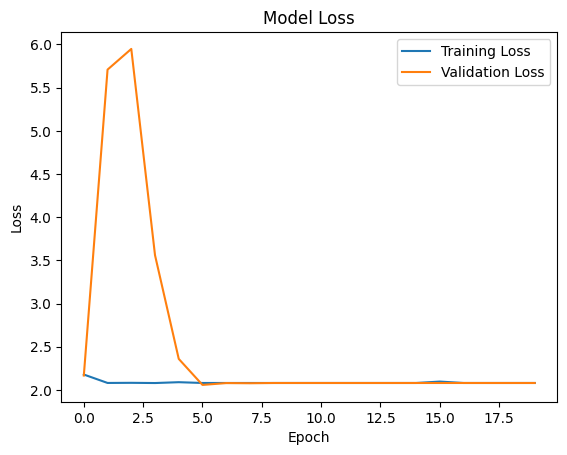

In [66]:
from matplotlib import pyplot as plt

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [40]:
from sklearn.neighbors import KNeighborsClassifier

# Load the data using the ImageDataGenerator as before

# Extract the features and labels from the training set
train_features, train_labels = next(train_generator)

# Reshape the features to a 2D array for input to the KNN algorithm
train_features = train_features.reshape(train_features.shape[0], -1)

# Create the KNN classifier and fit it to the training data
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(train_features, train_labels)

# Extract the features and labels from the validation set
val_features, val_labels = next(val_generator)

# Reshape the features to a 2D array for input to the KNN algorithm
val_features = val_features.reshape(val_features.shape[0], -1)

# Evaluate the KNN classifier on the validation set
val_acc = knn.score(val_features, val_labels)

# Print the validation accuracy
print("Validation accuracy:", val_acc)

Validation accuracy: 0.5625


In [74]:
from sklearn.neighbors import KNeighborsClassifier

train_features, train_labels = next(train_generator)
train_features = train_features.reshape(train_features.shape[0], -1)
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(train_features, train_labels)
val_features, val_labels = next(val_generator)
val_features = val_features.reshape(val_features.shape[0], -1)

val_acc = knn.score(val_features, val_labels)
print("Validation accuracy:", val_acc)

Validation accuracy: 0.9375


In [92]:
from sklearn.neighbors import KNeighborsClassifier


train_features, train_labels = next(train_generator)
train_features = train_features.reshape(train_features.shape[0], -1)
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(train_features, train_labels)
val_features, val_labels = next(val_generator)
val_features = val_features.reshape(val_features.shape[0], -1)
val_acc = knn.score(val_features, val_labels)
print("Validation accuracy:", val_acc)

Validation accuracy: 0.1875


In [70]:
train_images, train_labels = next(train_generator)
val_images, val_labels = next(val_generator)
test_images, test_labels = next(test_generator)

import numpy as np
train_images = train_images.reshape(train_images.shape[0], -1)
val_images = val_images.reshape(val_images.shape[0], -1)
test_images = test_images.reshape(test_images.shape[0], -1)

train_labels = np.argmax(train_labels, axis=1)
val_labels = np.argmax(val_labels, axis=1)
test_labels = np.argmax(test_labels, axis=1)


from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(train_images, train_labels)


val_acc = rf_clf.score(val_images, val_labels)
test_acc = rf_clf.score(test_images, test_labels)

print("Validation accuracy:", val_acc)


Validation accuracy: 0.84375


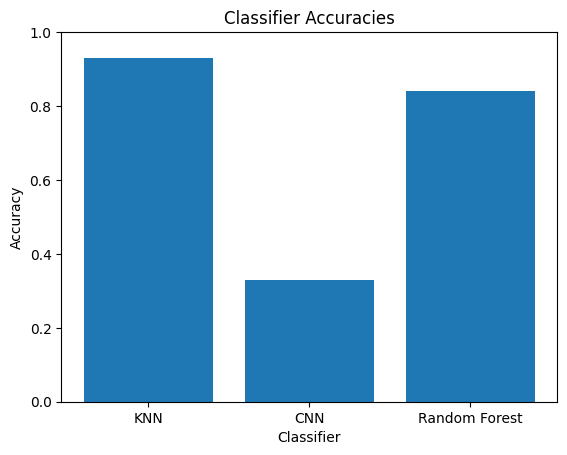

In [93]:
import matplotlib.pyplot as plt

classifiers = ['KNN', 'CNN', 'Random Forest']
accuracies = [0.93, 0.33, 0.84]

plt.bar(classifiers, accuracies)
plt.title('Classifier Accuracies')
plt.xlabel('Classifier')
plt.ylabel('Accuracy')
plt.ylim([0.0, 1.0])
plt.show()